In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import *

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
heartData = pd.read_csv("archive/heart.csv")

In [3]:
heartData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heartData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
duplicate=heartData.duplicated()
duplicate

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [9]:
heartData=heartData.drop_duplicates()

In [11]:
corr = heartData.corr()
corr.style.background_gradient(cmap="coolwarm")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [14]:
X= heartData.drop(['target'],axis=1)
Y= heartData['target']
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=0)
xtrain.shape,xtest.shape

((241, 13), (61, 13))

## KNN MODEL

In [18]:
knn_scores = []
for k in range(2,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(xtrain.values, ytrain.values)
    knn_score=round(knn_classifier.score(xtest.values, ytest.values),2)
    knn_scores.append(knn_score)

knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(xtrain, ytrain)
knn_score = knn_classifier.predict(xtest)
print(classification_report(ytest,knn_score))


              precision    recall  f1-score   support

           0       0.50      0.44      0.47        25
           1       0.64      0.69      0.67        36

    accuracy                           0.59        61
   macro avg       0.57      0.57      0.57        61
weighted avg       0.58      0.59      0.59        61



Text(0.5, 1.0, 'KNN Scores for different k neighbors')

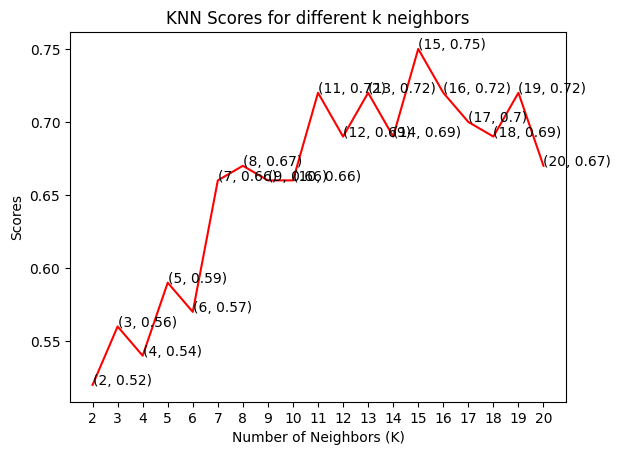

In [20]:
plt.plot([k for k in range(2,21)],knn_scores, color="red")
for i in range(2,21):
    plt.text(i, knn_scores[i-2],(i,knn_scores[i-2]))
plt.xticks([i for i in range(2,21)])
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Scores")
plt.title("KNN Scores for different k neighbors")

## Support Vector Machine 

In [23]:
from sklearn.metrics import accuracy_score

svc_scores=[]
kernels=['linear','poly','rbf','sigmoid']

for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(xtrain.values,ytrain.values)
    svc_scores.append(round(svc_classifier.score(xtest.values,ytest.values),2))

svc_classifier = SVC(kernel = kernels[0])
svc_classifier.fit(xtrain.values,ytrain.values)
svc_prediction_result=svc_classifier.predict(xtest.values)

print(accuracy_score(ytest.values,svc_prediction_result))

0.8360655737704918


Text(0.5, 1.0, 'SVM scores Activation funtion wise ...')

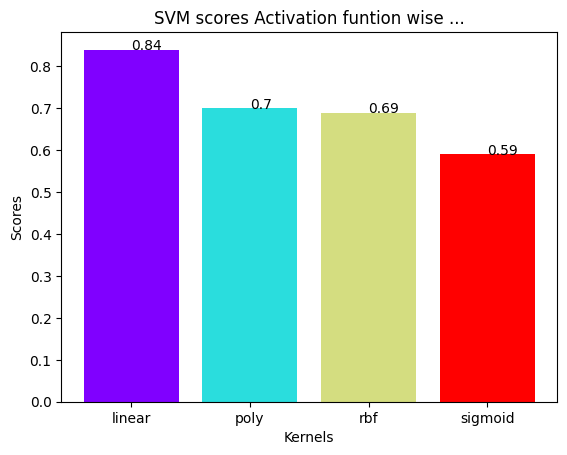

In [26]:
colors = rainbow(np.linspace(0,1,len(kernels)))
plt.bar(kernels,svc_scores,color = colors)
for i in range(len(kernels)):
    plt.text(i,svc_scores[i],svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('SVM scores Activation funtion wise ...')

## Decision Tree

In [27]:
dt_scores = []
for i in range(1,len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i,random_state = 0)
    dt_classifier.fit(xtrain.values,ytrain.values)
    dt_scores.append(round(dt_classifier.score(xtest.values,ytest.values),2))
print("Done")

Done


In [28]:
print(dt_scores)

[0.64, 0.67, 0.8, 0.67, 0.66, 0.62, 0.75, 0.74, 0.72, 0.79, 0.8, 0.74, 0.84]


In [29]:
dt_classifier = DecisionTreeClassifier(max_features = 13, random_state = 0)
dt_classifier.fit(xtrain.values,ytrain.values)

DecisionTreeClassifier(max_features=13, random_state=0)

Text(0.5, 1.0, 'Decision Tree Classifierscores for different number od maximum features ')

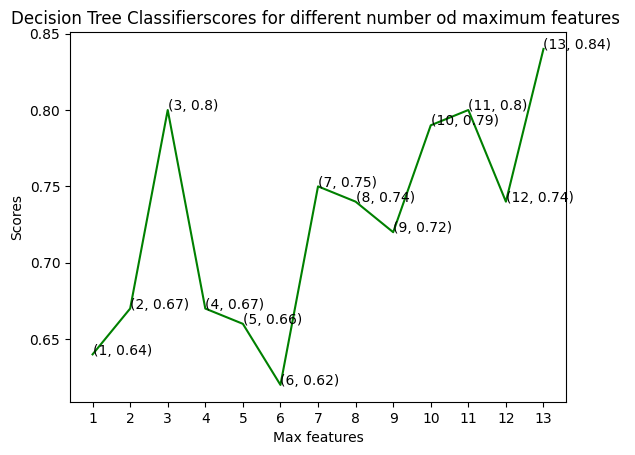

In [31]:
plt.plot([i for i in range(1,len(X.columns)+1)],dt_scores,color = 'green')
for i in range(1,len(X.columns)+1):
    plt.text(i,dt_scores[i-1],(i,dt_scores[i-1]))
plt.xticks([i for i in range(1,len(X.columns)+1)])
plt.xlabel("Max features")
plt.ylabel("Scores")
plt.title("Decision Tree Classifierscores for different number od maximum features ")

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf_scores = []
estimators = [10,20,100,200,500]
for i in estimators:
    rf_classifier =  RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(xtrain.values,ytrain.values)
    rf_scores.append(round(rf_classifier.score(xtest.values,ytest.values),2))
    

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

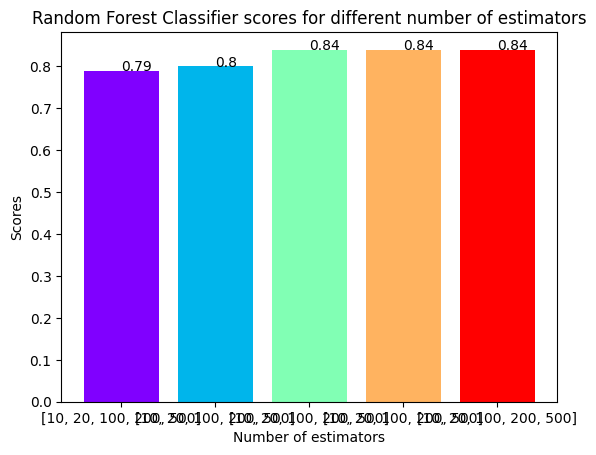

In [35]:
colors = rainbow(np.linspace(0,1,len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores,color =colors,width=0.8)
for i in range(len(estimators)):
    plt.text(i,rf_scores[i],rf_scores[i])
plt.xticks(ticks= [i for i in range(len(estimators))],labels = [str(estimators) for estimator in estimators])
plt.xlabel("Number of estimators")
plt.ylabel("Scores")
plt.title("Random Forest Classifier scores for different number of estimators")
        

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [39]:
logistic_model = LogisticRegression()
logistic_model.fit(xtrain.values,ytrain.values)
logistic_model_predictions = logistic_model.predict(xtest.values)
print(accuracy_score(ytest.values,logistic_model_predictions))
print(classification_report(ytest.values,logistic_model_predictions))

0.8360655737704918
              precision    recall  f1-score   support

           0       0.86      0.72      0.78        25
           1       0.82      0.92      0.87        36

    accuracy                           0.84        61
   macro avg       0.84      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61



In [43]:
import pickle 
all_models =[rf_classifier,logistic_model,dt_classifier,svc_classifier,knn_classifier]

with open("models.pkl","wb") as files:
    pickle.dump(all_models,files)
print("Done")

Done


In [45]:
open_file = open("models.pkl","rb")
loaded_list = pickle.load(open_file)
print(loaded_list)
open_file.close()
print("Done")

[RandomForestClassifier(n_estimators=500, random_state=0), LogisticRegression(), DecisionTreeClassifier(max_features=13, random_state=0), SVC(kernel='linear'), KNeighborsClassifier()]
Done
